In [304]:
#all the installed packages
#pip install requests#for the image
#pip install kaggle#for data
#pip install pandas#data manipulations
#pip install numpy#data manipulations
#pip install openpyxl#to read excel file
#pip install matplotlib
#!pip install seaborn


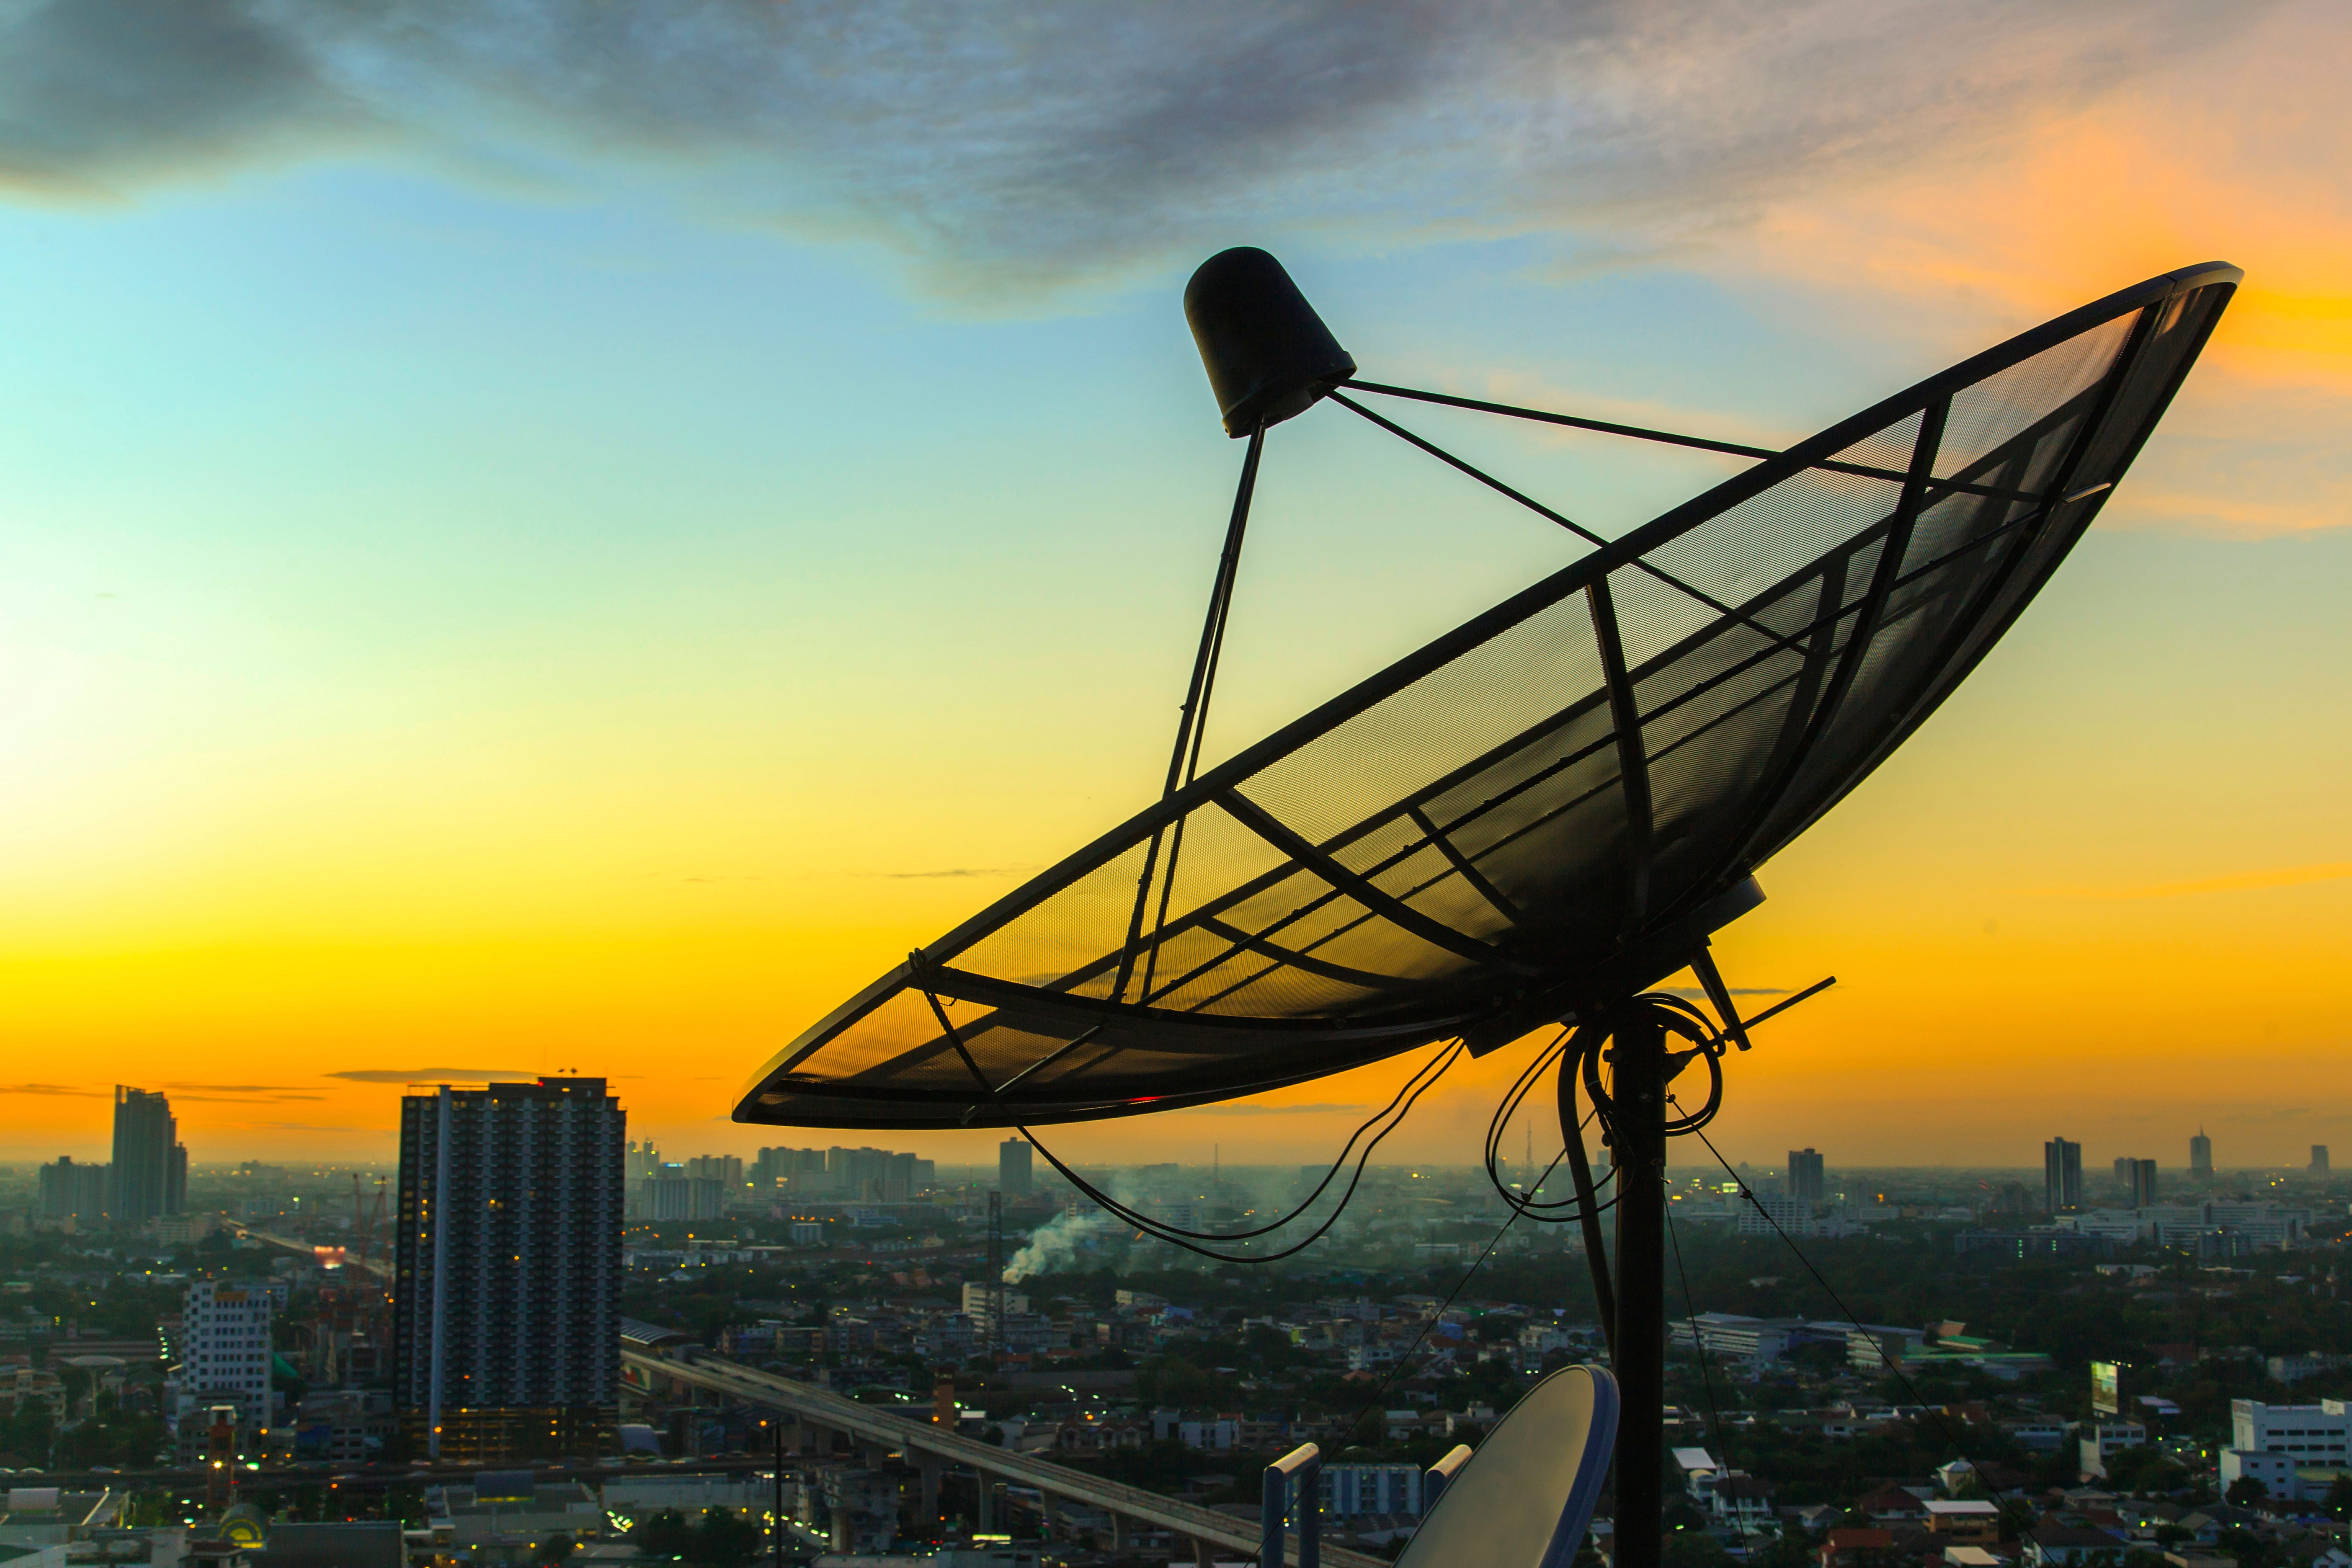

In [305]:
##here the code is taken to create a front view
# #@title Project
import requests
from IPython.display import Image, display
from IPython.display import HTML

# Direct image URL
image_url = "https://miro.medium.com/max/11232/1*Xx9dIim-_cfYtg8N69jIWg.jpeg"

# Download the image
response = requests.get(image_url)
with open('image.jpg', 'wb') as file:
    file.write(response.content)

import base64

# Convert the image to a base64 string
with open("image.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Create the HTML code with the base64 image
html_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Header</title>
    <!-- Include Font Awesome -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: flex-start; /* Align items to the top */
            /*align-items: center;*/
            padding: 20px;
            background-color: #f4f4f4;
            border-bottom: 2px solid #ccc;
        }}
        .header img {{
            border-radius: 50%;
            width: 100px;
            height: 100px;
            object-fit: cover;
            margin-right: 20px;
            box-shadow: 0 0 20px #86e3dd; /* Glowing effect */
            vertical-align: top;
        }}
        .header .text-container {{
            display: flex;
            flex-direction: column;
        }}
        .header h1 {{
            margin: 0;
            font-size: 2em;
            color: #000; 
        }}
        .header p {{
            margin: 5px 0 0 0;
            font-size: 1em;
            color: #000;
        }}
        .header .social-icons {{
            margin-top: 10px;
        }}
        .header .social-icons a {{
            margin-right: 10px;
            color: #000;
            text-decoration: none;
            font-size: 1.5em;
        }}
        .header .social-icons a:hover {{
            color: #000;
        }}
    </style>
</head>
<body>
    <header class="header">
        <img src="data:image/jpeg;base64,{encoded_string}" alt="Profile Picture">
        <div class="text-container">


            <h1>Telecom Churn Analytics and Prediction— end-to-end data analytics project</h1>
            <p>skills: Python, Power BI, Machine learning</p>
            &nbsp;
            <p>Snehal Varbhe</p>

            <div class="social-icons">



                <a href="https://youtube.com/@alexright_data_analytics?si=UrHTNp55KZlL3X3S" target="_blank"><i class="fab fa-youtube"></i></a>
                <a href="https://patreon.com/Alex_Right" target="_blank"><i class="fab fa-patreon"></i></a>
                <a href="https://www.linkedin.com/in/oleksandr-rovnyak/" target="_blank"><i class="fab fa-linkedin"></i></a>
                <a href="mailto:example@example.com"><i class="fas fa-envelope"></i>



            </div>
        </div>
    </header>
</body>
</html>
"""

# Display the HTML code in the Jupyter/Colab notebook
display(HTML(html_code))

Data preparation:

In [306]:
!kaggle datasets list -s telecom

ref                                                           title                                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
abhinav89/telecom-customer                                    Telecom customer                                      14MB  2017-08-27 03:01:50          12359        200  0.7058824        
mnassrib/telecom-churn-datasets                               Telecom Churn Dataset                                100KB  2019-07-05 08:08:31          23418        182  1.0              
jpacse/datasets-for-churn-telecom                             telecom churn (cell2cell)                              4MB  2018-12-14 16:22:18           8196        104  0.64705884       
shilongzhuang/telecom-customer-churn-by-maven-analytics       🙁📡 

In [307]:
!kaggle datasets download -d datazng/telecom-company-churn-rate-call-center-data

Dataset URL: https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data
License(s): CC0-1.0
telecom-company-churn-rate-call-center-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [308]:
#this unzipps the folder 
import zipfile
import os

# Path to the downloaded zip file
zip_file_path = r'telecom-company-churn-rate-call-center-data.zip'
output_dir = 'unzipped_dataset_folder'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)


 Let's start by examining the contents of the telecom dataset. We'll begin by loading the data and inspecting its structure. Once we have an overview, we can proceed with exploratory data analysis (EDA), including univariate and multivariate analysis, and visualizations to identify patterns related to customer churn.

In [309]:
import pandas as pd

# Load the dataset
file_path = 'unzipped_dataset_folder\Telecom Churn Rate Dataset.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


## Data Cleaning

In [310]:
#display the size of DataFrame
print("\nDataFrame Shape:")
print(data.shape)


DataFrame Shape:
(7043, 23)


In [311]:
#display all the column names
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'numAdminTickets', 'numTechTickets', 'Churn'],
      dtype=object)

In [312]:
#check the data type of all columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
numAdminTickets       int64
numTechTickets        int64
Churn                object
dtype: object

In [313]:
# Display basic information about the DataFrame
print("\nBasic Information:")
print(data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

To remove unwanted columns, we first need to identify which columns are unnecessary for analysis. We can achieve this by examining the initial structure of the dataset and then dropping the unwanted columns.Here customerID is unwanted as it typically doesn't contribute to patterns or insights and is often excluded to avoid redundancy.

In [314]:
#drop column customerID and tenure
data.drop(columns= ['customerID','numAdminTickets','numTechTickets'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Correcting data types before analysis is crucial for accuracy, performance, and data integrity. To address this, convert the TotalCharges column from float to int and handle any NaN values appropriately.

In [315]:
# Convert 'TotalCharges' to numeric, coercing errors to handle non-numeric values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [316]:
# Check for any non-numeric values that were converted to NaN
non_numeric_total_charges = data['TotalCharges'].isna().sum()
print(non_numeric_total_charges)

11


In [317]:
# Display rows with non-numeric 'TotalCharges'
non_numeric_rows = data[data['TotalCharges'].isna()]
non_numeric_rows


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [318]:
# Display summary statistics
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [319]:
# Display number of missing values in each column
print("\nNumber of Missing Values:")
print(data.isnull().sum())


Number of Missing Values:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


There are 11 rows with non-numeric TotalCharges, which were converted to NaN. These rows have a tenure of 0, indicating that these customers are new and likely haven't been billed yet or the details are not present in dataset. When the percentage of missing values less than 5% we can drop it.

In [320]:
#Percentage of missing data
int(data['TotalCharges'].isna().sum())*100/len(data["TotalCharges"])

#drop the null values
data.dropna(how = 'any', inplace = True)

In [321]:
#statistical terms of numeric data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


The 25th percentile (first quartile) is 9 months, the median (50th percentile) is 29 months, and the 75th percentile is 55 months, suggesting that half of the customers have been with the company for less than 29 months.

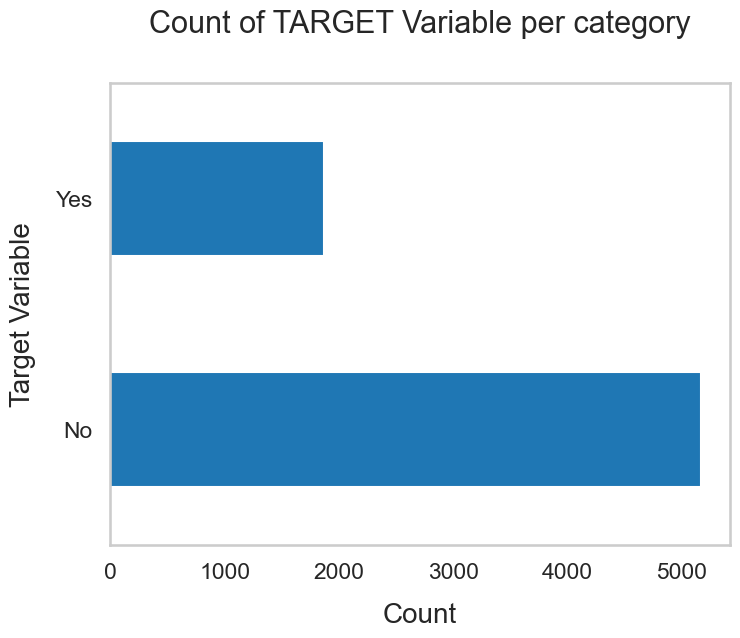

In [322]:
import matplotlib.pyplot as plt
#output value distribution chart
data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)
plt.grid(False)

In [323]:
#distribution of data
(data['Churn'].value_counts()/data.shape[0])*100

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

Imbalance in Data:

The dataset is imbalanced, with a larger proportion of non-churning customers (73.42%) compared to churning customers (26.58%). This imbalance can influence the results of predictive models, as they might be biased towards predicting the majority class (no churn).

Majority and Minority Classes:
Majority Class: Customers who did not churn (73.42%).
Minority Class: Customers who churned (26.58%).
In predictive modeling, class imbalance can lead to a model that predicts the majority class more accurately, while underperforming on the minority class. Special techniques, such as oversampling, undersampling, or using algorithms designed to handle imbalance, may be necessary.

Skewness:
The distribution is skewed towards customers who did not churn. This skewness suggests that a significant majority of the data points belong to the no-churn category, which can impact statistical analyses and model performance.

## Data Analysis

In [324]:
#create a copy of dataset for anipulations
df=data.copy()
data1=data.copy()
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [325]:
#apply binning on tenure to analyse whaich plan people opt for
print("Minimun tenure period: ",df['tenure'].min())
print("Maximum tenure period: ",df['tenure'].max())

Minimun tenure period:  1
Maximum tenure period:  72


In [326]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [327]:
df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [328]:
#drop column tenure
df.drop(columns= ['tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

Distribution of each categorical column with respect to churn

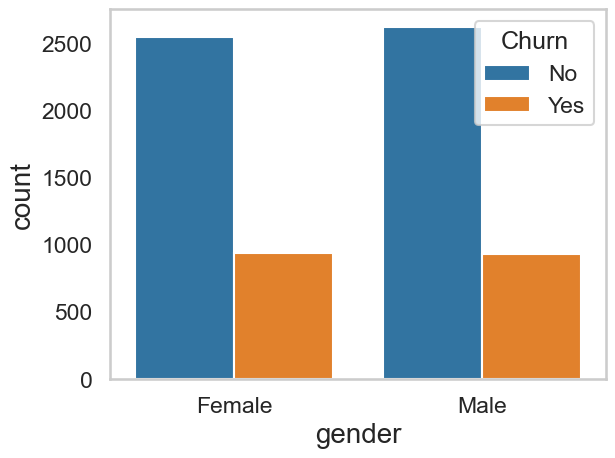

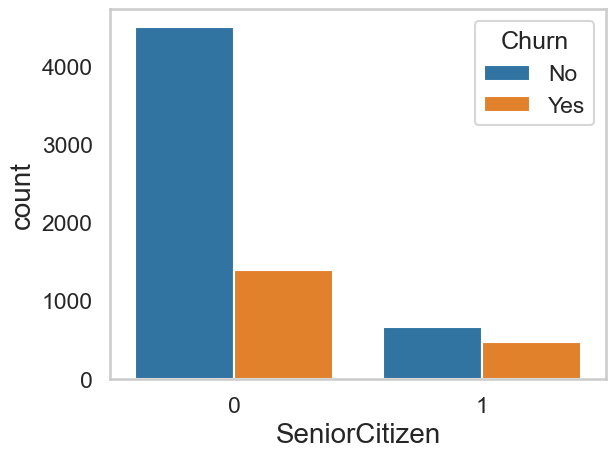

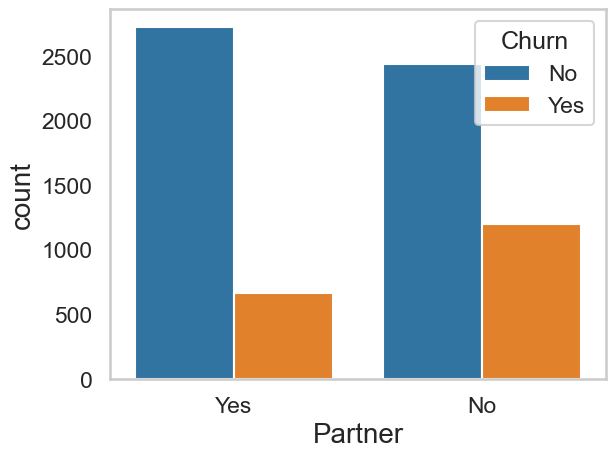

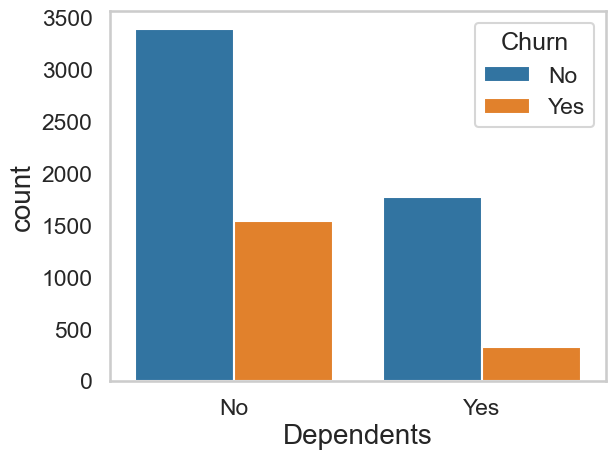

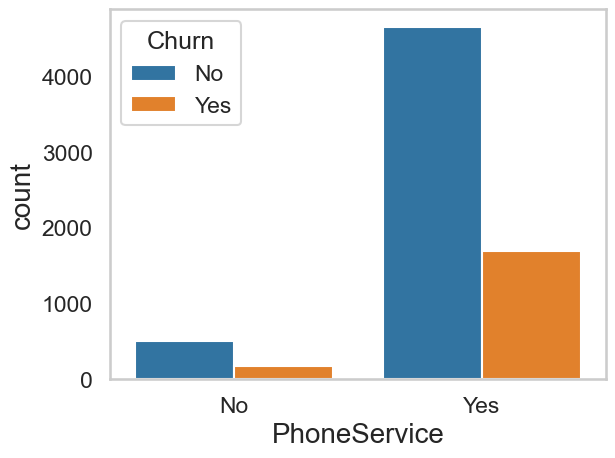

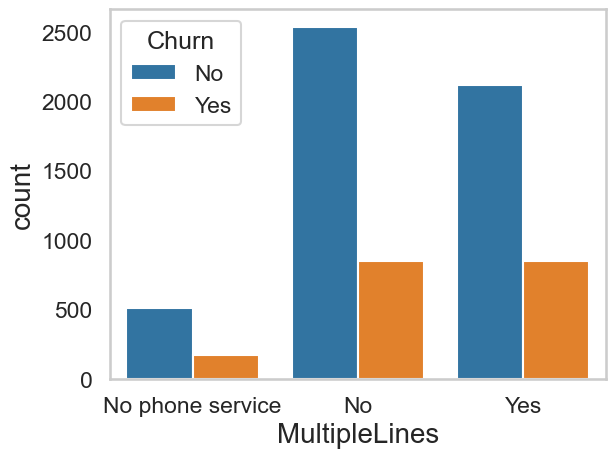

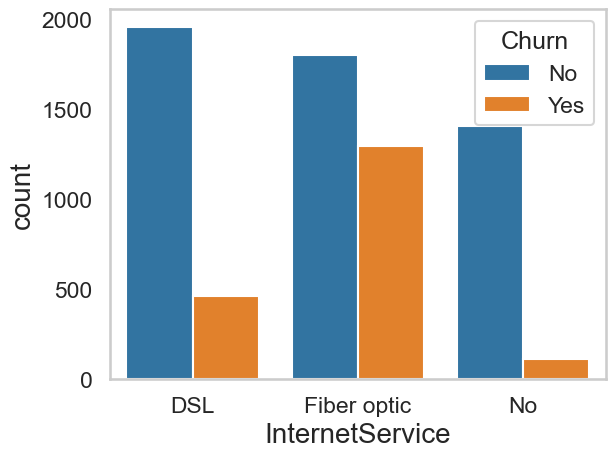

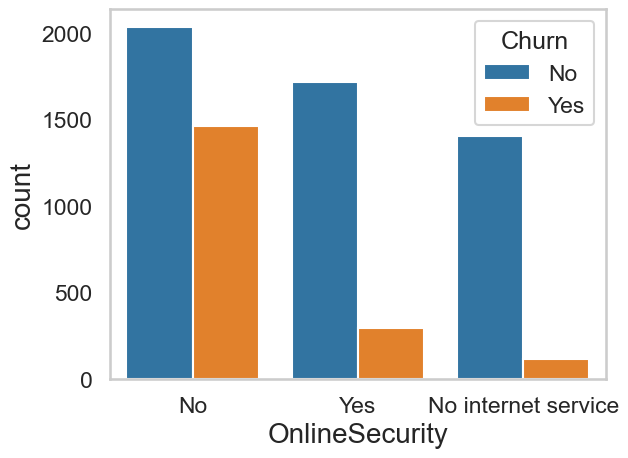

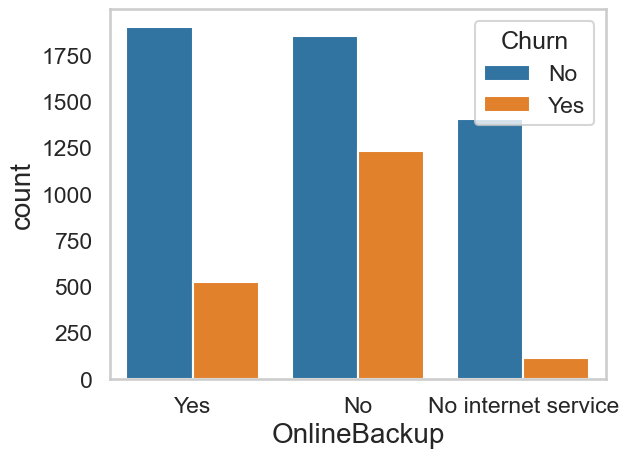

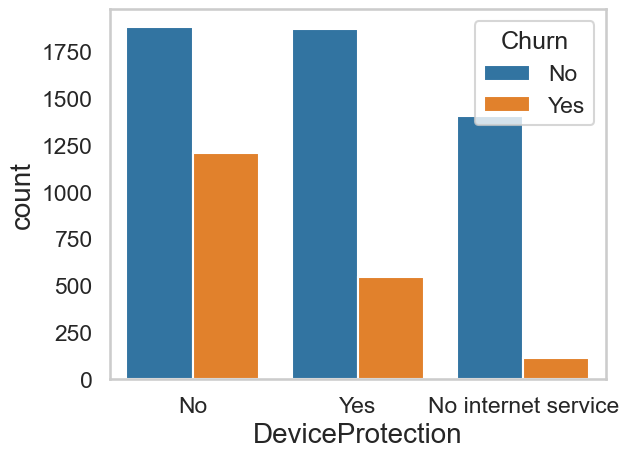

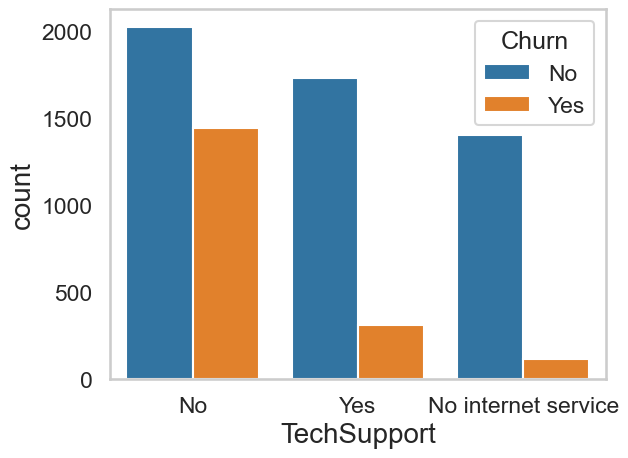

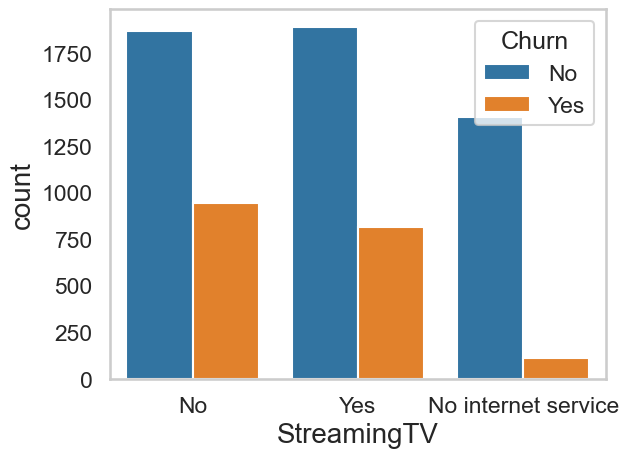

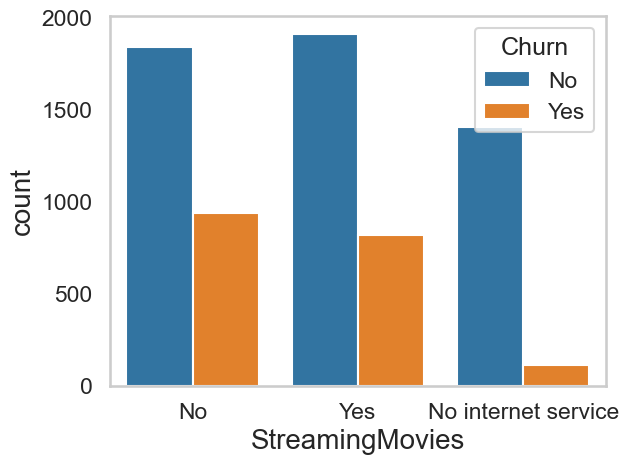

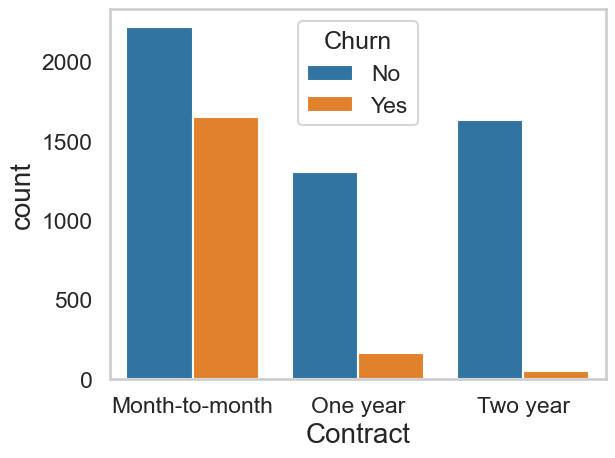

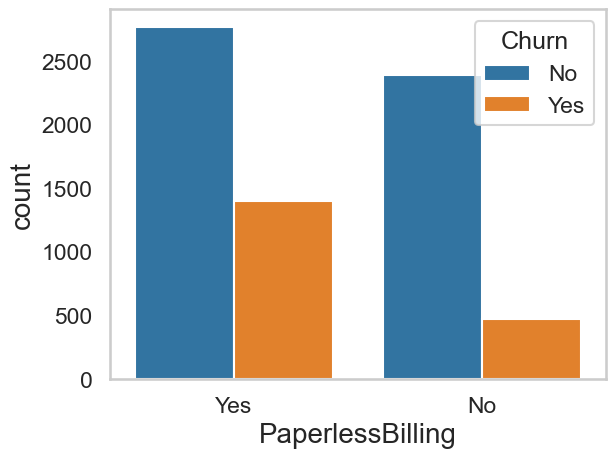

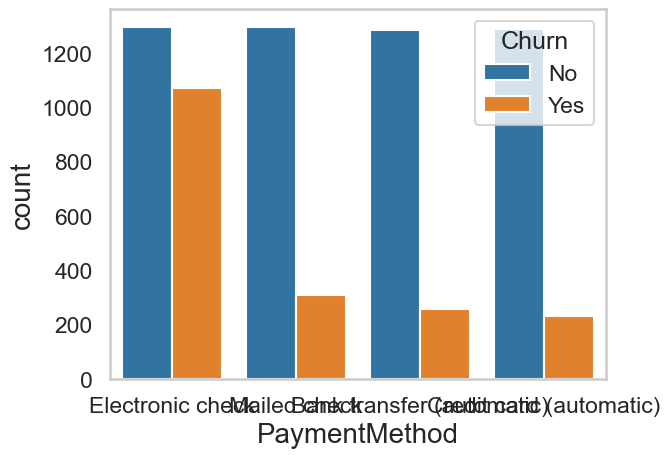

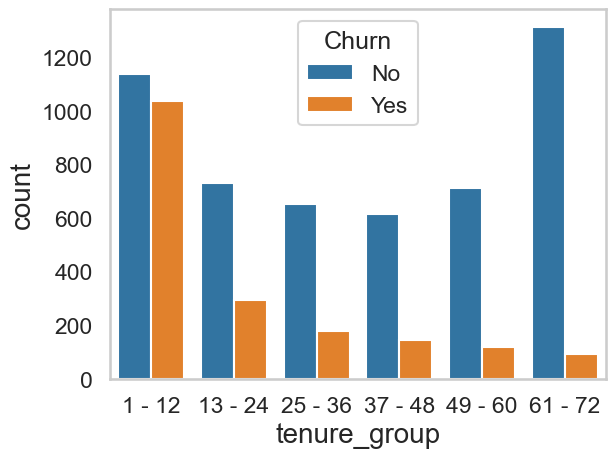

In [329]:
import seaborn as sns
for i,predictor in enumerate(df.drop(columns=['MonthlyCharges','TotalCharges','Churn'])):
    plt.figure(i)
    sns.countplot(x=predictor,data=df,hue='Churn')
    plt.grid(False)

In [330]:
#convert the output column into numeric value
import numpy as np
df['Churn'] = np.where(df.Churn == 'Yes',1,0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [331]:
#convert categorical data to numeric
df=pd.get_dummies(df)
df=df.astype(int)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


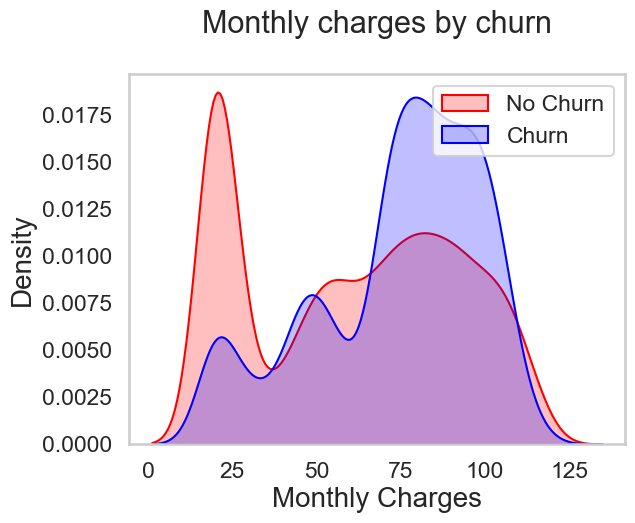

In [332]:
#relation between MonthlyCharges and TotalCharges 
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],color="Red", fill = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.grid(False)

For high monthly charges the churn rate increases

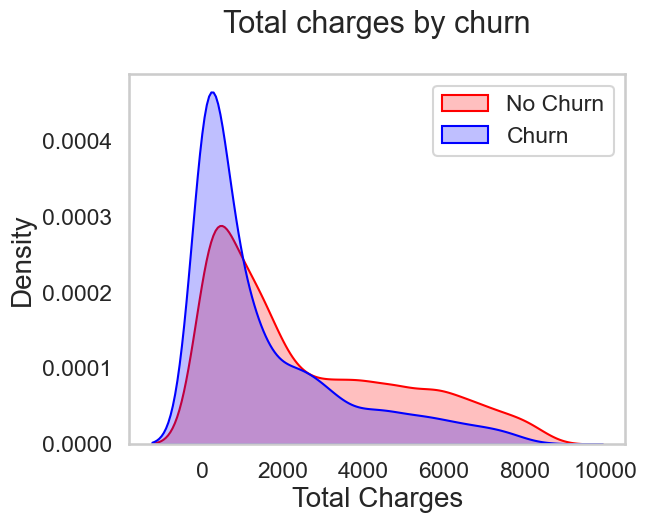

In [333]:
#relation between MonthlyCharges and TotalCharges 
Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],color="Red", fill = True)
Mth = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')
plt.grid(False)

High churn rate at lower total charges.

As higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

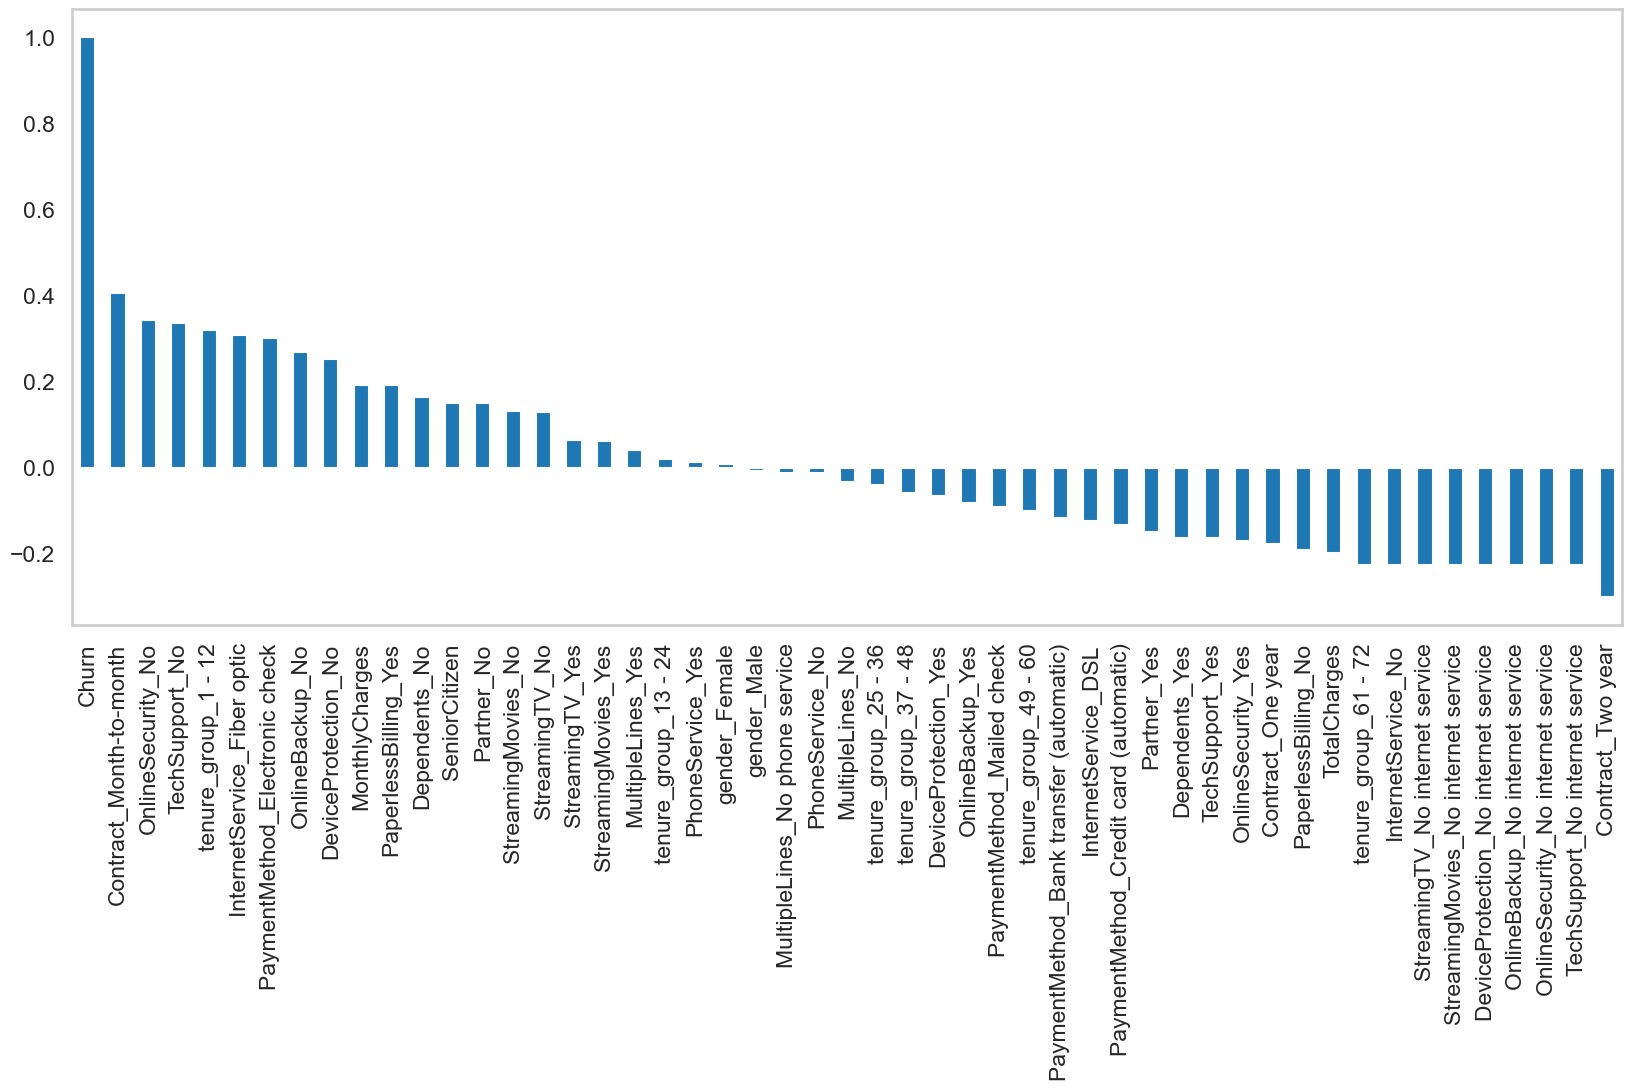

In [334]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.grid(False)

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

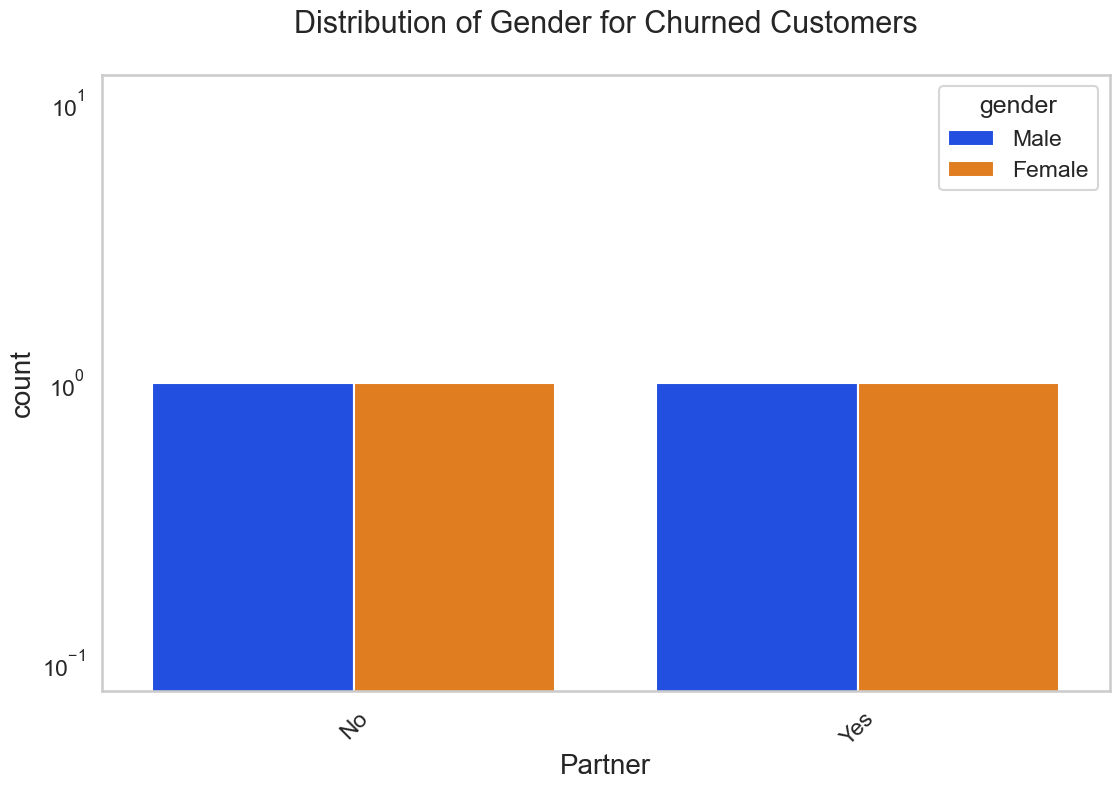

In [335]:
new_df1_target0=data1.loc[data1["Churn"]=='No']
new_df1_target1=data1.loc[data1["Churn"]=="Yes"]

def uniplot(df1,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df1[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df1, x= col, order=df1[col].value_counts().index,hue = hue,palette='bright') 
    plt.grid(False)
    plt.show()

uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

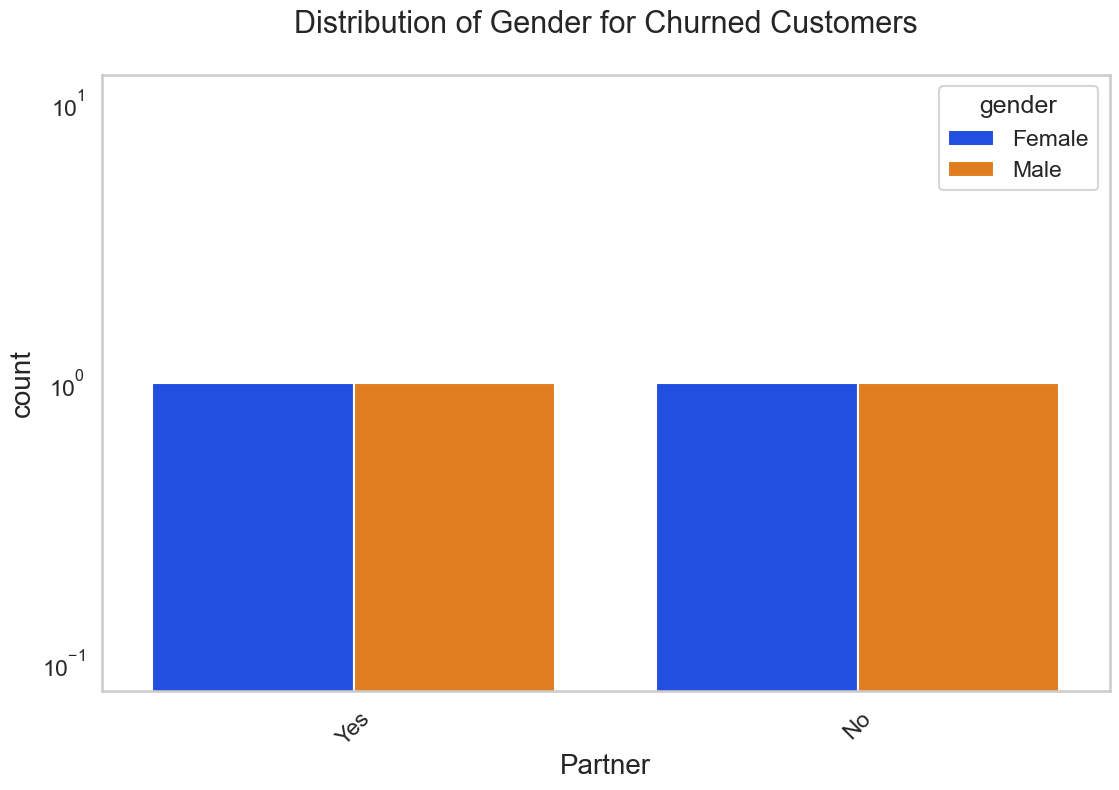

In [336]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')